In [26]:
# Import statements
from IPython.display import Image
from matplotlib import pyplot as plt
import cv2
import numpy as np
import optuna
from sklearn.metrics import mean_squared_error
# Open the images
image = cv2.imread('examples/FLIR2602.jpg')

In [27]:
# Create a mask based on the Laplace operator
mask = cv2.Laplacian(image, cv2.CV_8U, ksize=3)
# Invert the mask (black to white, white to black)
mask_inv = cv2.bitwise_not(mask)

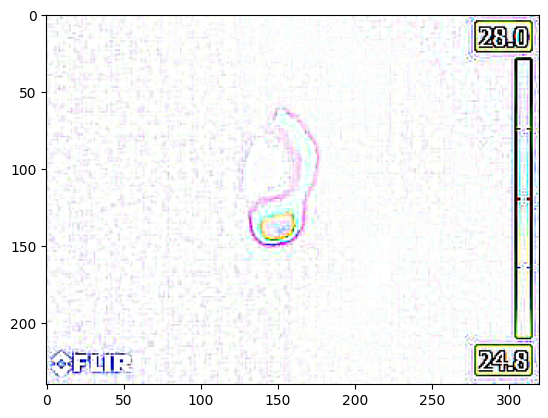

In [28]:
#Show the image with matplotlib
plt.imshow(mask_inv)
plt.show()

In [29]:
print(mask_inv.shape)

(240, 320, 3)


In [30]:
print(mask_inv)

[[[255 255 255]
  [255 255 239]
  [247 255 255]
  ...
  [255 255 231]
  [255 255 255]
  [183 167 175]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [235 219 211]
  [255 255 255]
  [231 207 203]]

 [[223 219 235]
  [235 233 233]
  [245 239 241]
  ...
  [237 219 255]
  [255 255 255]
  [175 143 159]]

 ...

 [[255 255 255]
  [233 241 255]
  [255 239 255]
  ...
  [125 165 207]
  [187 161 137]
  [255 255 255]]

 [[255 255 255]
  [199 213 255]
  [239 209 223]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [183 195 255]
  [255 255 255]
  ...
  [215 207 155]
  [215 231 255]
  [127 167 223]]]


In [31]:
def objective(trial):
    """
    Fungsi tujuan untuk Optuna yang mengoptimalkan parameter kernel size (ksize) untuk operasi Laplace.

    Parameters:
    - trial: object Optuna trial

    Returns:
    - mse: mean squared error antara gambar asli dan gambar hasil pemrosesan
    """    # Definisikan hyperparameter yang akan dioptimalkan
    ksize = trial.suggest_int('ksize', 1, 31, step=2)  # Kernel size harus ganjil

    # Proses gambar dengan hyperparameter yang diberikan
    mask = cv2.Laplacian(image, cv2.CV_8U, ksize=ksize)
    mask_inv = cv2.bitwise_not(mask)

    # Konversi gambar asli dan hasil pemrosesan ke grayscale
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    mask_inv_gray = cv2.cvtColor(mask_inv, cv2.COLOR_BGR2GRAY)

    # Hitung mean squared error
    mse = mean_squared_error(image_gray, mask_inv_gray)
    
    return mse

In [32]:
# Buat studi Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

[I 2024-05-24 21:16:03,356] A new study created in memory with name: no-name-384901a7-ce82-40a6-bf65-25eb2f50f7dc
[I 2024-05-24 21:16:03,462] Trial 0 finished with value: 101.14184895833334 and parameters: {'ksize': 17}. Best is trial 0 with value: 101.14184895833334.
[I 2024-05-24 21:16:03,462] Trial 1 finished with value: 101.2038671875 and parameters: {'ksize': 9}. Best is trial 0 with value: 101.14184895833334.
[I 2024-05-24 21:16:03,478] Trial 2 finished with value: 101.2038671875 and parameters: {'ksize': 9}. Best is trial 0 with value: 101.14184895833334.
[I 2024-05-24 21:16:03,483] Trial 3 finished with value: 101.14184895833334 and parameters: {'ksize': 17}. Best is trial 0 with value: 101.14184895833334.
[I 2024-05-24 21:16:03,489] Trial 4 finished with value: 100.74555989583334 and parameters: {'ksize': 15}. Best is trial 4 with value: 100.74555989583334.
[I 2024-05-24 21:16:03,494] Trial 5 finished with value: 100.74555989583334 and parameters: {'ksize': 15}. Best is trial 

In [33]:
# Cetak hyperparameter terbaik
best_params = study.best_params
print(f"Best hyperparameters: {best_params}")

Best hyperparameters: {'ksize': 13}


In [34]:
# Proses gambar dengan hyperparameter terbaik
best_ksize = best_params['ksize']
best_mask_inv = (image, best_ksize)

In [37]:
print(best_mask_inv)

(array([[[109,  97, 249],
        [110,  99, 249],
        [111, 102, 252],
        ...,
        [ 68,  34, 249],
        [ 68,  26, 245],
        [ 71,  25, 245]],

       [[108,  96, 250],
        [109,  97, 249],
        [111, 102, 252],
        ...,
        [ 57,  22, 242],
        [ 80,  36, 255],
        [ 65,  18, 240]],

       [[103,  90, 246],
        [105,  93, 247],
        [109,  97, 249],
        ...,
        [ 64,  27, 255],
        [ 68,  22, 248],
        [ 69,  19, 243]],

       ...,

       [[169, 203, 255],
        [168, 195, 251],
        [176, 191, 254],
        ...,
        [ 61,  21, 246],
        [ 63,  14, 230],
        [ 95,  44, 255]],

       [[174, 206, 255],
        [165, 191, 255],
        [170, 187, 250],
        ...,
        [ 70,  25, 242],
        [ 78,  36, 255],
        [ 70,  29, 250]],

       [[167, 198, 255],
        [163, 189, 255],
        [176, 193, 255],
        ...,
        [ 75,  29, 242],
        [ 65,  24, 246],
        [ 62,  25, 251]

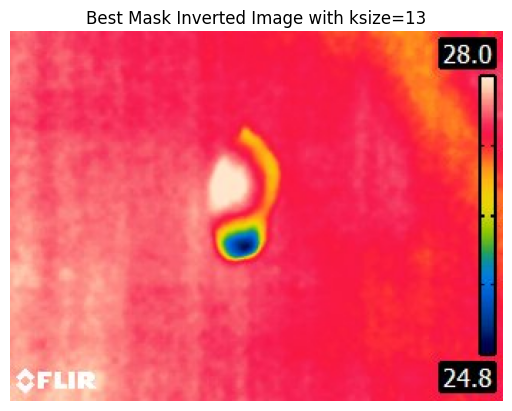

In [38]:
# Konversi array gambar ke format RGB
best_mask_inv_rgb = cv2.cvtColor(best_mask_inv[0], cv2.COLOR_BGR2RGB)

# Tampilkan gambar
plt.imshow(best_mask_inv_rgb)
plt.title(f'Best Mask Inverted Image with ksize={best_ksize}')
plt.axis('off')
plt.show()